In [1]:
import pandas as pd
import math
from math import sqrt
from scipy.stats import norm, t
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import statistics as stat

In [2]:
datafile = '../../dataset/ch17/swim_the_lake_2016.txt'
swim_the_lake_2016 = pd.read_csv(datafile, sep='\t')

In [3]:
swim_the_lake_2016.head()

,Name,Sex,Age,Start Day,Month,Year,Time(min),Direction
0,Marilyn Bell,F,16.00000,8,Sep,1954,1255.0,SN
1,John Jaremey,M,36.00000,23,Jul,1956,1273.0,SN
2,Brenda Fisher,F,28.00000,12,Aug,1956,1131.0,SN
3,Bill Sadlo,M,57.31781,23,Aug,1957,1501.0,SN
4,Jim Woods,M,41.00000,26,Aug,1957,1115.0,SN


In [4]:
swim_the_lake_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       62 non-null     object 
 1   Sex        62 non-null     object 
 2   Age        62 non-null     float64
 3   Start Day  62 non-null     int64  
 4   Month      62 non-null     object 
 5   Year       62 non-null     int64  
 6   Time(min)  62 non-null     float64
 7   Direction  62 non-null     object 
dtypes: float64(2), int64(2), object(4)
memory usage: 4.0+ KB


In [5]:
len(swim_the_lake_2016)

62

In [6]:
swim_the_lake_2016.columns

Index(['Name', 'Sex', 'Age', 'Start Day', 'Month', 'Year', 'Time(min)',
       'Direction'],
      dtype='object')

In [7]:
swim_the_lake_2016.index

RangeIndex(start=0, stop=62, step=1)

In [8]:
swim_the_lake_2016[swim_the_lake_2016.Name=='Vicki Keith']

,Name,Sex,Age,Start Day,Month,Year,Time(min),Direction
22,Vicki Keith,F,25.0,14,Aug,1986,1619.0,NS
23,Vicki Keith,F,26.0,5,Aug,1987,3370.0,NSN
24,Vicki Keith,F,27.0,29,Aug,1988,1413.0,SN
27,Vicki Keith,F,28.0,3,Sep,1989,1860.0,SN


In [9]:
swim_the_lake_2016 = swim_the_lake_2016.drop(index=23)
#swim_the_lake_2016 = swim_the_lake_2016.drop(index=23)
#swim_the_lake_2016 = swim_the_lake_2016.drop(index=24)
#swim_the_lake_2016 = swim_the_lake_2016.drop(index=27)

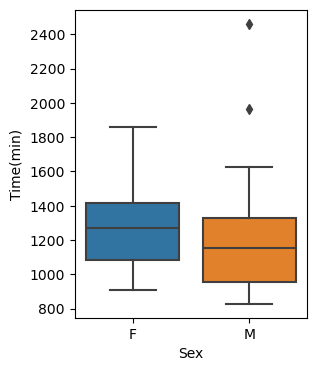

In [10]:
plt.figure(figsize=(3, 4))
sns.boxplot(data=swim_the_lake_2016, x='Sex', y='Time(min)');

In [11]:
F = swim_the_lake_2016[swim_the_lake_2016.Sex=='F']['Time(min)']
M = swim_the_lake_2016[swim_the_lake_2016.Sex=='M']['Time(min)']

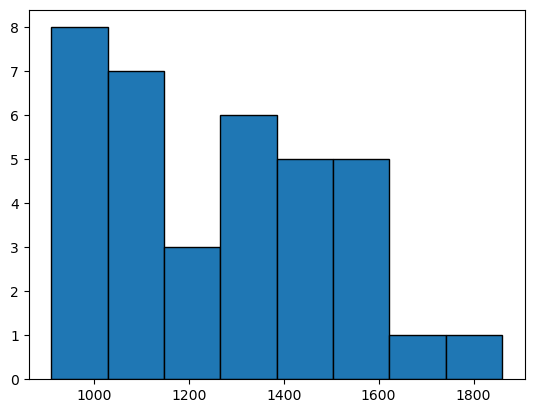

In [12]:
plt.hist(F, bins=8, edgecolor='k');

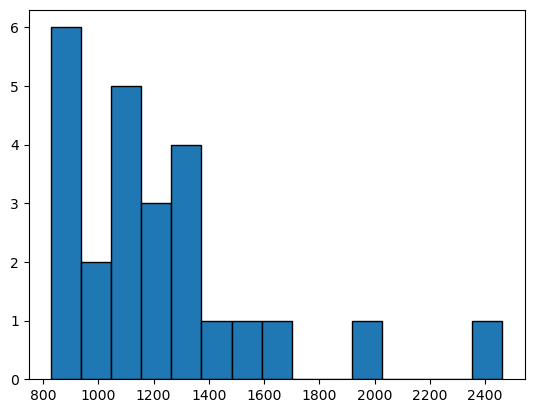

In [13]:
plt.hist(M, bins=15, edgecolor='k');

In [14]:
def iqr(data):
    q75, q25 = np.percentile(data, [75, 25])
    return q75, q25, q75-q25

In [15]:
_q75, _q25, f_iqr = iqr(F)
_q75, _q25, m_iqr = iqr(M)

summary_of_swim_the_lake_2016= pd.DataFrame(
data={

    'Count': [ len(F),
               len(M)  
             ],
    
    'Mean': [round(stat.mean(F), 2),
             round(stat.mean(M), 2)
            ],
    

    'StdDev':[round(stat.stdev(F), 3),
              round(stat.stdev(M), 3)
            ],
    
     },
    
    index=['F', 'M']
)

summary_of_swim_the_lake_2016

,Count,Mean,StdDev
F,36,1262.08,254.701
M,25,1226.29,368.022


**Problem 79.** Swim the lake 2016 revisited As we saw in Chapter 8, Exer- cise 46, between 1954 and 2016, swimmers have crossed Lake Ontario 62 times. Both women and men have made the cross- ing. Here are some plots (we’ve omitted a crossing by Vikki Keith, who swam a round trip—north to south to north—in 3390 minutes):

Is there a difference between the mean amount of time (in min- utes) it takes female and male swimmers to swim the lake?

a) Construct and interpret a 95% confidence interval for the dif- ference between female and male crossing times (technology gives 39 df).

b) Find the P-value for the appropriate hypothesis test.

c) Comment on the assumptions and conditions and your conclusions.

In [16]:
def sol79a():

    n_female = 36
    n_male = 25
    
    y_bar_female = 1262.08
    y_bar_male = 1226.29
    
    s_female = 254.701
    s_male = 368.022

    df = 39
    
    SE_y_bar_female = s_female*s_female / n_female
    SE_y_bar_male = s_male*s_male / n_male
    SE = sqrt (SE_y_bar_female + SE_y_bar_male)
    
    
    observed_diff = y_bar_female - y_bar_male
    tscore = (y_bar_female - y_bar_male) / SE
    tcritical = t.ppf(0.975, df)

    print(f"observed_diff: {observed_diff:.2f}")
    print(f"SE: {SE:.2f}")
    
    print (f"tscore: {tscore:.2f}")
   
    print(f"95% CI: ({(observed_diff-SE*tcritical):.2f}, {(observed_diff+SE*tcritical):.2f})")

sol79a()

observed_diff: 35.79
SE: 84.97
tscore: 0.42
95% CI: (-136.07, 207.65)


**Answer to 79(a)**

The 95% confidence interval for the difference between female and male crossing time is (-136.07, 207.65).  I am 95% confident that the mean crossing time of female is in between 136.07 less and 207.65 more than the mean time for male to cross the Lake Ontario.  However, the CI includes 0, and we may not too sure for the difference between the crossing time of female and the male's.

In [17]:
def sol79b():

    n_female = 36
    n_male = 25
    
    y_bar_female = 1262.08
    y_bar_male = 1226.29
    
    s_female = 254.701
    s_male = 368.022

    df = 39
    
    SE_y_bar_female = s_female*s_female / n_female
    SE_y_bar_male = s_male*s_male / n_male
    SE = sqrt (SE_y_bar_female + SE_y_bar_male)
    
    
    observed_diff = y_bar_female - y_bar_male
    tscore = (y_bar_female - y_bar_male) / SE
    tcritical = t.ppf(0.975, df)
    pval = t.cdf(tscore, df)

    print(f"observed_diff: {observed_diff:.2f}")
    print(f"SE: {SE:.2f}")
    
    print (f"tscore: {tscore:.2f}")
   
    print(f"95% CI: ({(observed_diff-SE*tcritical):.2f}, {(observed_diff+SE*tcritical):.2f})")

    print (f"pval: {pval:.4f}")
    

sol79b()

observed_diff: 35.79
SE: 84.97
tscore: 0.42
95% CI: (-136.07, 207.65)
pval: 0.6620


**Answer to 79(b)**

The p-value is 0.6620, which is high, and we fail to reject the null hypothesis of $_uF - _uM = 0$.

**Answer to 79(c)**

Randomization condition: Not from a random sample.

Independent groups assumption: The swimmers should be independent.

Nearly Normal condition: The boxplot and the histograms show the male group has outliers, and we should remove the outliers and test again.  The histograms of the two groups are reasonably unimodal and symmetric.

**Problem 80.**  Still swimming Here’s some additional information about the Ontario crossing times presented in Exercise 79. It is generally thought to be harder to swim across the lake from north to south. Indeed, this has been done only 5 times. Every one of those crossings was by a woman. If we omit those 5 crossings, the boxplots look like this:

Although not designated as an outlier, the slowest female time belongs to Vikki Keith, who crossed the lake swimming only butterfly stroke. Omitting that extraordinary swim gives the following summary statistics:

a) Do women or men appear to be faster at swimming across the lake? Support your answer by interpreting a confidence interval. (Use 37 df.)

b) Some might argue that the men are being unfairly slowed down by two extraordinarily slow swims. Here are the sum- maries without those two swims. Repeat part a based on these data. Does your conclusion change? (Use 47 df.)

c) Vikki Keith was responsible for two of the more remarkable crossings, but she also swam Lake Ontario two other times. In fact, of the 50 crossings in this analysis, 7 were repeat crossings by a swimmer who’d crossed the lake before. How does this fact affect your thoughts about the confidence interval?

In [18]:
# datafile = '../../dataset/ch17/swim_the_lake_2016.txt'
swim_the_lake = pd.read_csv(datafile, sep='\t')

In [19]:
swim_the_lake.head(n=50)

,Name,Sex,Age,Start Day,Month,Year,Time(min),Direction
0,Marilyn Bell,F,16.00000,8,Sep,1954,1255.0,SN
1,John Jaremey,M,36.00000,23,Jul,1956,1273.0,SN
2,Brenda Fisher,F,28.00000,12,Aug,1956,1131.0,SN
3,Bill Sadlo,M,57.31781,23,Aug,1957,1501.0,SN
4,Jim Woods,M,41.00000,26,Aug,1957,1115.0,SN
5,Jim Woods,M,45.00000,2,Sep,1961,1027.0,SN
6,Cindy Nicholas,F,16.00000,17,Aug,1974,910.0,SN
7,Diana Nyad,F,24.00000,30,Aug,1974,1095.0,NS
8,Debbie Roach,F,17.00000,16,Aug,1975,1110.0,SN
9,Angela Kondrak,F,17.00000,22,Aug,1976,1428.0,SN


In [20]:
swim_the_lake[swim_the_lake.Direction=='NS']

,Name,Sex,Age,Start Day,Month,Year,Time(min),Direction
7,Diana Nyad,F,24.0,30,Aug,1974,1095.0,NS
20,Marilyn Korzekwa,F,27.0,17,Aug,1984,1283.0,NS
22,Vicki Keith,F,25.0,14,Aug,1986,1619.0,NS
34,Kim Middleton,F,34.0,4,Sep,1993,1740.0,NS
35,Kim Middleton,F,35.0,30,July,1994,1574.0,NS


In [21]:
swim_the_lake = swim_the_lake.drop(index=7)
swim_the_lake = swim_the_lake.drop(index=20)
swim_the_lake = swim_the_lake.drop(index=22)
swim_the_lake = swim_the_lake.drop(index=34)
swim_the_lake = swim_the_lake.drop(index=35)
swim_the_lake.head(n=50)

,Name,Sex,Age,Start Day,Month,Year,Time(min),Direction
0,Marilyn Bell,F,16.000000,8,Sep,1954,1255.0,SN
1,John Jaremey,M,36.000000,23,Jul,1956,1273.0,SN
2,Brenda Fisher,F,28.000000,12,Aug,1956,1131.0,SN
3,Bill Sadlo,M,57.317810,23,Aug,1957,1501.0,SN
4,Jim Woods,M,41.000000,26,Aug,1957,1115.0,SN
5,Jim Woods,M,45.000000,2,Sep,1961,1027.0,SN
6,Cindy Nicholas,F,16.000000,17,Aug,1974,910.0,SN
8,Debbie Roach,F,17.000000,16,Aug,1975,1110.0,SN
9,Angela Kondrak,F,17.000000,22,Aug,1976,1428.0,SN
10,Kim Lumsdon,F,19.000000,27,Aug,1976,1287.0,SN


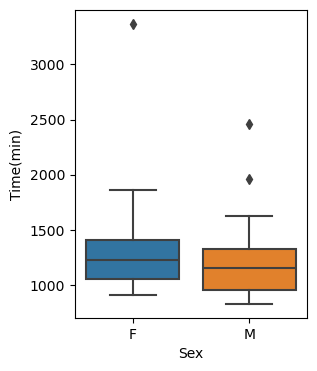

In [22]:
plt.figure(figsize=(3, 4))
sns.boxplot(data=swim_the_lake, x='Sex', y='Time(min)');

In [23]:
swim_the_lake[swim_the_lake.Name=='Vicki Keith']

,Name,Sex,Age,Start Day,Month,Year,Time(min),Direction
23,Vicki Keith,F,26.0,5,Aug,1987,3370.0,NSN
24,Vicki Keith,F,27.0,29,Aug,1988,1413.0,SN
27,Vicki Keith,F,28.0,3,Sep,1989,1860.0,SN


In [24]:
swim_the_lake = swim_the_lake.drop(index=23)

In [25]:
F = swim_the_lake[swim_the_lake.Sex=='F']['Time(min)']
M = swim_the_lake[swim_the_lake.Sex=='M']['Time(min)']

In [26]:
_q75, _q25, f_iqr = iqr(F)
_q75, _q25, m_iqr = iqr(M)

summary_of_swim_the_lake= pd.DataFrame(
data={

    'Count': [ len(F),
               len(M)  
             ],
    
    'Mean': [round(stat.mean(F), 2),
             round(stat.mean(M), 2)
            ],
    

    'StdDev':[round(stat.stdev(F), 3),
              round(stat.stdev(M), 3)
            ],
    
     },
    
    index=['F', 'M']
)

summary_of_swim_the_lake

,Count,Mean,StdDev
F,31,1229.81,241.992
M,25,1226.29,368.022
